In [1]:
#TMDB file
#Set Up Dependencies
import pandas as pd
import requests
import numpy as np
import scipy as sp
import pprint as pp
import matplotlib.pyplot as plt

In [2]:
#Open and import csv files

movie_tmdb = pd.read_csv("Resources/tmdb_cleaned_df5.csv")

movie_tmdb

,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,...,netflix_provider,stan_provider,amazon_provider,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime
0,134803,tt0221431,en,The Newcomers,"Drama,Family",1/01/2000,False,False,2.339,3.9,...,No,No,Yes,4.8,465,US,United States of America,0,0,90
1,65397,tt0249840,en,Nightfall,"Drama,Sci-Fi,Thriller",1/01/2000,False,False,1.555,3.3,...,No,Yes,No,3.3,463,US,United States of America,0,0,85
2,44388,tt0139388,en,It Had to Be You,"Comedy,Romance",1/01/2000,False,False,9.691,6.2,...,No,No,Yes,5.6,2265,US,United States of America,0,0,90
3,10384,tt0134983,en,Supernova,"Horror,Sci-Fi,Thriller",14/01/2000,False,False,13.377,5.0,...,No,No,Yes,4.8,18336,CH,Switzerland,90000000,14828081,91
4,77434,tt0197096,en,What's Cooking?,"Comedy,Drama,Romance",20/01/2000,False,False,3.519,5.7,...,No,No,Yes,6.8,2811,US,United States of America,0,0,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,575322,tt5656994,en,Звёздный разум,"Adventure,Sci-Fi,Thriller",6/01/2022,False,False,925.268,5.6,...,No,No,Yes,3.4,3040,CY,Cyprus,0,0,98
5349,825808,tt11209212,en,See for Me,"Crime,Drama,Mystery",7/01/2022,False,False,63.155,6.2,...,Yes,No,No,5.8,5113,CA,Canada,0,0,92
5350,916740,tt13978306,en,Brazen,"Crime,Drama,Mystery",13/01/2022,False,False,61.998,4.9,...,Yes,No,No,4.1,12594,US,United States of America,0,0,94
5351,760926,tt6020800,en,Gold,"Action,Adventure,Thriller",13/01/2022,False,False,70.686,6.3,...,No,Yes,No,5.4,10031,AU,Australia,6500000,176048,97


In [ ]:
#Overall Analysis 

#Top 5 highest rated genre per 5 years (2000-20004, 2005-2009, 2010-2014, 2015-2019, 2020-2023)
#Movie Production Map (Which countries(e.ge can be specific to SEAR or in WPR) have produced the highest amount movies in the past 20 years). How many in Australia?
#Budget Revenue - According to IMDB Ratings (Need to remove rows with 0)


In [95]:
#Netflix Data Only

netflix = movie_tmdb.query("netflix_provider == 'Yes'")

netflix_clean = netflix.drop(columns= ["stan_provider", "amazon_provider"], axis=1)

netflix_clean.head(50)

,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,tmdb_vote_count,providers,netflix_provider,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime
17,9532,tt0195714,en,Final Destination,"Horror,Thriller",17/03/2000,False,False,66.943,6.6,4711,Netflix,Yes,6.7,259315,US,United States of America,23000000,112880294,98
27,889,tt0158622,en,The Flintstones in Viva Rock Vegas,"Comedy,Family,Romance",28/04/2000,False,False,23.184,4.8,634,Netflix,Yes,3.7,24048,US,United States of America,83000000,59468275,90
28,25069,tt0217629,en,Looking for Alibrandi,"Comedy,Drama,Romance",4/05/2000,False,False,2.802,6.8,23,Netflix,Yes,7.0,3388,AU,Australia,0,0,103
31,10560,tt0210616,en,Center Stage,"Drama,Music,Romance",12/05/2000,False,False,14.645,6.9,291,Netflix,Yes,6.6,21918,US,United States of America,29000000,26385941,115
40,55311,tt9230920,en,Before the Flying Circus,Documentary,1/07/2000,False,False,2.302,8.5,4,Netflix,Yes,7.3,178,GB,United Kingdom,0,0,55
47,134,tt0190590,en,"O Brother, Where Art Thou?","Adventure,Comedy,Crime",30/08/2000,False,False,26.457,7.3,3529,Netflix,Yes,7.7,315055,FR,France,26000000,71870729,107
54,10562,tt0164212,en,Under Suspicion,"Crime,Drama,Thriller",24/09/2000,False,False,14.669,6.1,382,Netflix,Yes,6.4,26309,US,United States of America,25000000,1308242,110
56,10461,tt0208988,en,Get Carter,"Action,Crime,Drama",6/10/2000,False,False,23.651,5.1,460,Netflix,Yes,5.1,35089,US,United States of America,63600000,19412993,102
57,1597,tt0212338,en,Meet the Parents,"Comedy,Romance",6/10/2000,False,False,28.273,6.7,5232,"Netflix, Amazon Prime Video, Stan",Yes,7.0,338593,US,United States of America,55000000,330444045,108
58,641,tt0180093,en,Requiem for a Dream,Drama,6/10/2000,False,False,12.912,8.0,8569,"Netflix, Stan",Yes,8.3,845177,US,United States of America,4500000,7390108,102


In [4]:
#How many movies are on Netflix?

num_movies = netflix_clean.nunique()

num_movies

tmdb_id              1815
imdb_id              1815
original_language       1
original_title       1807
genres                262
release_date         1353
video                   1
adult                   1
popularity           1757
tmdb_rating_avg        62
tmdb_vote_count      1012
providers               4
netflix_provider        1
imdb_rating            64
imdb_votes           1710
iso_country            58
country_name           58
budget                166
revenue               621
runtime               156
dtype: int64

In [30]:
#What are the top 10 movies on Netflix based on TMDB? Is it the same as IMDB?

#Top 10 movies accorrding to TMDB "Rating Avg"

tmdb10_netflix = netflix_clean.sort_values(by='tmdb_rating_avg', ascending=False, ignore_index=True)

tmdb10_netflix.head(10)


,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,tmdb_vote_count,providers,netflix_provider,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime
0,668632,tt10181594,en,Uncle Naji in UAE,"Comedy,Horror",28/03/2019,False,False,1.236,10.0,1,Netflix,Yes,5.2,63,AE,United Arab Emirates,0,0,95
1,798851,tt10549360,en,Black Rose,Drama,28/02/2018,False,False,1.515,10.0,1,Netflix,Yes,7.6,55,NG,Nigeria,25000,0,120
2,542423,tt7416536,en,Sew the Winter to My Skin,"Action,Adventure",8/02/2019,False,False,1.583,10.0,1,Netflix,Yes,5.5,152,DE,Germany,0,0,118
3,822256,tt9660510,en,Like A Rolling Stone: The Life & Times of Ben ...,Documentary,13/06/2021,False,False,2.674,10.0,1,Netflix,Yes,7.3,359,US,United States of America,0,0,102
4,663635,tt11242532,en,Viva the Underdogs,Documentary,22/01/2020,False,False,2.400,9.3,3,Netflix,Yes,8.1,286,AU,Australia,700000,0,73
5,776596,tt13646976,en,Bring Your Own Brigade,Documentary,6/08/2021,False,False,2.938,9.0,2,Netflix,Yes,7.2,319,US,United States of America,0,0,120
6,773935,tt13453940,en,Spirit Riding Free: Ride Along Adventure,"Action,Adventure,Animation",8/12/2020,False,False,3.128,8.7,3,Netflix,Yes,6.0,65,US,United States of America,0,0,22
7,55311,tt9230920,en,Before the Flying Circus,Documentary,1/07/2000,False,False,2.302,8.5,4,Netflix,Yes,7.3,178,GB,United Kingdom,0,0,55
8,155,tt0468569,en,The Dark Knight,"Action,Crime,Drama",14/07/2008,False,False,85.691,8.5,28926,"Netflix, Stan",Yes,9.0,2656186,GB,United Kingdom,185000000,1004558444,152
9,664280,tt11989890,en,David Attenborough: A Life on Our Planet,"Biography,Documentary",28/09/2020,False,False,13.906,8.5,260,Netflix,Yes,8.9,32515,GB,United Kingdom,0,0,83


In [31]:
imdb10_netflix = netflix_clean.sort_values(by='imdb_rating', ascending=False, ignore_index=True)

imdb10_netflix.head(10)

,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,tmdb_vote_count,providers,netflix_provider,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime
0,768722,tt9653814,en,MUM Misunderstandings of Miscarriage,Documentary,1/10/2020,False,False,1.175,0.0,0,Netflix,Yes,9.2,28,AU,Australia,0,0,83
1,155,tt0468569,en,The Dark Knight,"Action,Crime,Drama",14/07/2008,False,False,85.691,8.5,28926,"Netflix, Stan",Yes,9.0,2656186,GB,United Kingdom,185000000,1004558444,152
2,664280,tt11989890,en,David Attenborough: A Life on Our Planet,"Biography,Documentary",28/09/2020,False,False,13.906,8.5,260,Netflix,Yes,8.9,32515,GB,United Kingdom,0,0,83
3,1060467,tt11010054,en,My Next Guest with David Letterman and Shah Ru...,Talk-Show,25/10/2019,False,False,3.246,0.0,0,Netflix,Yes,8.8,1351,US,United States of America,0,0,101
4,27205,tt1375666,en,Inception,"Action,Adventure,Sci-Fi",15/07/2010,False,False,104.663,8.4,32934,"Netflix, Stan",Yes,8.8,2355697,GB,United Kingdom,160000000,825532764,148
5,157336,tt0816692,en,Interstellar,"Adventure,Drama,Sci-Fi",5/11/2014,False,False,154.271,8.4,30224,"Netflix, Stan",Yes,8.6,1835078,GB,United Kingdom,165000000,701729206,169
6,373043,tt2299383,en,Advantageous,Sci-Fi,3/04/2012,False,False,2.166,8.0,1,Netflix,Yes,8.6,75,US,United States of America,0,0,23
7,823754,tt14544192,en,Bo Burnham: Inside,"Comedy,Drama,Music",22/07/2021,False,False,11.031,8.2,307,Netflix,Yes,8.6,49679,US,United States of America,0,0,87
8,978453,tt6042648,en,A Second Chance,"Drama,Family",14/04/2018,False,False,0.893,0.0,0,Netflix,Yes,8.6,48,US,United States of America,22000,0,130
9,563708,tt8716334,en,Springsteen On Broadway,"Documentary,Music",16/12/2018,False,False,4.595,8.0,39,Netflix,Yes,8.5,2264,US,United States of America,0,0,153


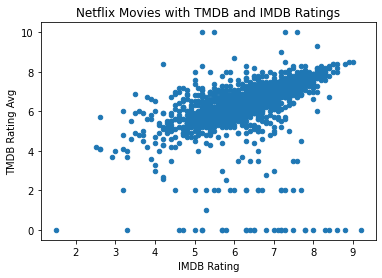

In [32]:
#Netflix IMDB vs TMDB
##There is a huge gap between the voter counts in TMDB and IMDB, that have affected the comparison of movie ratings below.
##We can't compare budget and against ratings, no information on budget for some movies on top 10)

budget = imdb10_netflix.plot.scatter(x="imdb_rating", y="tmdb_rating_avg")

plt.xlabel("IMDB Rating")
plt.ylabel("TMDB Rating Avg")
plt.title("Netflix Movies with TMDB and IMDB Ratings")
plt.show()

In [97]:
#List of genres

netflix_clean["genres"].unique()

array(['Horror,Thriller', 'Comedy,Family,Romance', 'Comedy,Drama,Romance',
       'Drama,Music,Romance', 'Documentary', 'Adventure,Comedy,Crime',
       'Crime,Drama,Thriller', 'Action,Crime,Drama', 'Comedy,Romance',
       'Drama', 'Comedy,Drama,History', 'Comedy,Fantasy',
       'Action,Comedy,Crime', 'Adventure,Drama', 'Comedy',
       'Biography,Crime,Drama', 'Drama,Thriller',
       'Adventure,Comedy,Drama', 'Action,Adventure,Fantasy',
       'Drama,Romance', 'Adventure,Animation,Comedy', 'Action,Western',
       'Crime,Drama,Mystery', 'Crime,Thriller', 'Biography,Drama,Sport',
       'Biography,Drama', 'Drama,Romance,Sport', 'Action,Horror,Sci-Fi',
       'Adventure,Comedy,Family', 'Action,Crime,Mystery', 'Comedy,Sport',
       'Drama,Western', 'Biography,Drama,Music', 'Comedy,Documentary',
       'Comedy,Drama', 'Action,Adventure,Comedy',
       'Fantasy,Horror,Mystery', 'Action,Drama,Thriller',
       'Action,Adventure,Sci-Fi', 'Horror', 'Comedy,Family',
       'Action,Crime,Th

In [117]:
#Genre Count in Netflix, what type of movie is on this streaming platform?

horror = netflix_clean.genres.value_counts().Horror
docu = netflix_clean.genres.value_counts().Documentary
thriller = netflix_clean.genres.value_counts().Thriller
comedy = netflix_clean.genres.value_counts().Comedy 
family= netflix_clean.genres.value_counts().Family
rom = netflix_clean.genres.value_counts().Romance
drama = netflix_clean.genres.value_counts().Drama
action= netflix_clean.genres.value_counts().Action
music = netflix_clean.genres.value_counts().Music
sport = netflix_clean.genres.value_counts().Sport
crime = netflix_clean.genres.value_counts().Crime
anim = netflix_clean.genres.value_counts().Animation

##below can't be found from the genres column -> Need to figure out if str.cont is better
# short = netflix_clean.genres.value_counts().Short
# bio = netflix_clean.genres.value_counts().Biography
# mystery = netflix_clean.genres.value_counts().Mystery
# sci-fi = netflix_clean.genres.value_counts().Scifi
# adven = netflix_clean.genres.value_counts().Adventure
# west = netflix_clean.genres.value_counts().Western
# talk = netflix_clean.genres.value_counts().TalkShow
# game = netflix_clean.genres.value_counts().Game
# musical = netflix_clean.genres.value_counts().Musical
# history = netflix_clean.genres.value_counts().History
# war = netflix_clean.genres.value_counts().War
# fantasy = netflix_clean.genres.value_counts().Fantasy

netflix_genre = pd.DataFrame({
    "Horror": [horror],
    "Documentary": [docu],
    "Comedy": [comedy],
    "Thriller": [thriller],
    "Family": [family],
    "Romance": [rom],
    "Drama": [drama],
    "Action": [action],
    "Music": [music],
    "Sport": [sport],
    "Crime": [crime],
    "Animation": [anim]
#     "Biography": [bio],
#     "Adventure": [adven],
#     "Western": [west],
    

})

netflix_genre.head()

,Horror,Documentary,Comedy,Thriller,Family,Romance,Drama,Action,Music,Sport,Crime,Animation
0,2,98,239,16,3,7,82,5,4,2,1,5


In [127]:
#PieChart of Genre available on Netflix 


In [79]:
#Stan Data Only
stan = movie_tmdb.query("stan_provider == 'Yes'")

stan_clean = stan.drop(columns= ["netflix_provider", "amazon_provider"], axis=1)

stan_clean

,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,tmdb_vote_count,providers,stan_provider,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime
1,65397,tt0249840,en,Nightfall,"Drama,Sci-Fi,Thriller",1/01/2000,False,False,1.555,3.3,4,Stan,Yes,3.3,463,US,United States of America,0,0,85
8,4234,tt0134084,en,Scream 3,"Horror,Mystery",3/02/2000,False,False,38.557,6.0,2746,Stan,Yes,5.6,145879,US,United States of America,40000000,161834276,116
11,2787,tt0134847,en,Pitch Black,"Action,Horror,Sci-Fi",18/02/2000,False,False,12.102,6.8,3846,Stan,Yes,7.1,242344,US,United States of America,23000000,53187659,108
14,16874,tt0216417,en,The Wog Boy,Comedy,24/02/2000,False,False,2.606,5.3,20,Stan,Yes,5.7,2196,AU,Australia,0,0,92
18,462,tt0195685,en,Erin Brockovich,"Biography,Drama",17/03/2000,False,False,27.033,7.4,2647,Stan,Yes,7.4,200756,US,United States of America,52000000,256271286,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,452019,tt7099280,en,Needle in a Timestack,"Drama,Fantasy,Romance",15/10/2021,False,False,8.904,5.6,39,Stan,Yes,5.2,1869,US,United States of America,0,0,111
5308,899235,tt15289090,en,Christmas on the Farm,"Comedy,Drama,Romance",1/12/2021,False,False,5.253,5.8,12,Stan,Yes,5.2,741,AU,Australia,0,0,85
5309,872130,tt15388610,en,Zoey's Extraordinary Christmas,"Comedy,Drama,Fantasy",1/12/2021,False,False,6.853,6.8,33,Stan,Yes,7.3,1867,US,United States of America,0,0,99
5318,664574,tt11628854,en,Silent Night,"Comedy,Drama",3/12/2021,False,False,24.051,6.1,323,Stan,Yes,5.7,14977,GB,United Kingdom,0,0,92


In [ ]:
##Perform same analysis as Netflix - Genre and Ratings

In [34]:
#Amazon Data only

amazon = movie_tmdb.query("stan_provider == 'Yes'")

amazon_clean = amazon.drop(columns= ["netflix_provider", "stan_provider"], axis=1)

amazon_clean

,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,tmdb_vote_count,providers,amazon_provider,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime
1,65397,tt0249840,en,Nightfall,"Drama,Sci-Fi,Thriller",1/01/2000,False,False,1.555,3.3,4,Stan,No,3.3,463,US,United States of America,0,0,85
8,4234,tt0134084,en,Scream 3,"Horror,Mystery",3/02/2000,False,False,38.557,6.0,2746,Stan,No,5.6,145879,US,United States of America,40000000,161834276,116
11,2787,tt0134847,en,Pitch Black,"Action,Horror,Sci-Fi",18/02/2000,False,False,12.102,6.8,3846,Stan,No,7.1,242344,US,United States of America,23000000,53187659,108
14,16874,tt0216417,en,The Wog Boy,Comedy,24/02/2000,False,False,2.606,5.3,20,Stan,No,5.7,2196,AU,Australia,0,0,92
18,462,tt0195685,en,Erin Brockovich,"Biography,Drama",17/03/2000,False,False,27.033,7.4,2647,Stan,No,7.4,200756,US,United States of America,52000000,256271286,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,452019,tt7099280,en,Needle in a Timestack,"Drama,Fantasy,Romance",15/10/2021,False,False,8.904,5.6,39,Stan,No,5.2,1869,US,United States of America,0,0,111
5308,899235,tt15289090,en,Christmas on the Farm,"Comedy,Drama,Romance",1/12/2021,False,False,5.253,5.8,12,Stan,No,5.2,741,AU,Australia,0,0,85
5309,872130,tt15388610,en,Zoey's Extraordinary Christmas,"Comedy,Drama,Fantasy",1/12/2021,False,False,6.853,6.8,33,Stan,No,7.3,1867,US,United States of America,0,0,99
5318,664574,tt11628854,en,Silent Night,"Comedy,Drama",3/12/2021,False,False,24.051,6.1,323,Stan,No,5.7,14977,GB,United Kingdom,0,0,92


In [ ]:
##Perform same analysis as Netflix - Genre and Ratings